In [105]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family = "gulim")
plt.rc("axes", unicode_minus = False) # 마이너스 출력할 때 에러나지 않도록

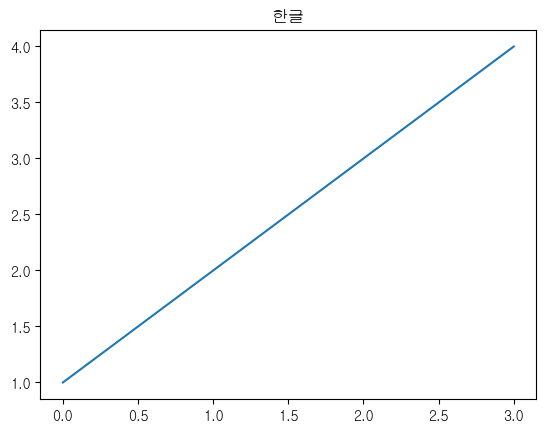

In [103]:
plt.plot([1, 2, 3, 4])
plt.title("한글")
plt.show()

In [104]:
titanic = sns.load_dataset("titanic")
print("titanic = \n", titanic.head())
print(titanic.info())

titanic = 
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived   

In [106]:
## missing
print("missing value = ")
print(titanic.isnull().sum())

titanic_df = titanic.loc[:, :"fare"]
titanic_df.info()

titanic_df.dropna(axis = 0, inplace=True)
titanic_df.info()

missing value = 
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------

In [107]:
##
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


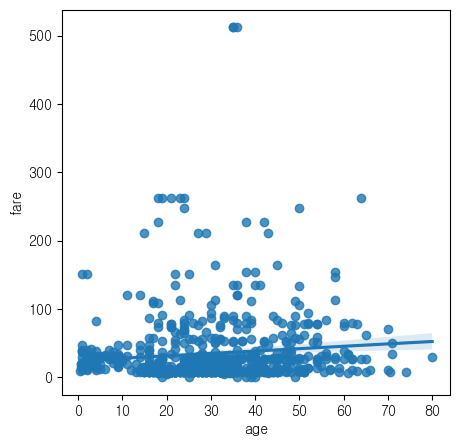

In [108]:
## sns.regplot
fig, ax = plt.subplots(figsize = (5,5))
sns.regplot(titanic_df, x = "age", y = "fare")
plt.show()
# fig.savefig("titanic_reg.png")

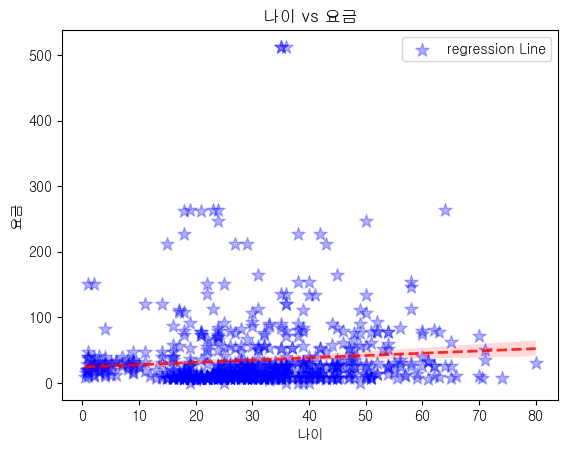

In [109]:
sns.regplot(titanic_df, x="age", y="fare",
            fit_reg=True,   # 회귀선 추가 (True로 설정 시 회귀선이 그려짐)
            color="r",      # 점과 회귀선의 색을 빨간색(r)으로 설정
            marker="*",     # 데이터 포인트의 마커를 별표(*)로 설정
            order=1,        # 1차 회귀선 (선형 회귀) # 차수를 높여 다항회귀 선 그릴 수 있다.
            label="Titanic data",
            scatter_kws={"fc":"b", "ec":"b", "s":100, "alpha":0.3},
            line_kws = {"lw":2, "ls":"--", "alpha":0.8}) # 그래프에 붙일 레이블 # 더 좋은게있다는데
# 그래프 제목과 축 레이블 추가
plt.title("나이 vs 요금")  # 그래프 제목
plt.xlabel("나이")  # X축 레이블
plt.ylabel("요금")  # Y축 레이블
plt.legend(['regression Line'], loc = 1) # 범례추가하고 위치설정
plt.show() # 그래프 출력

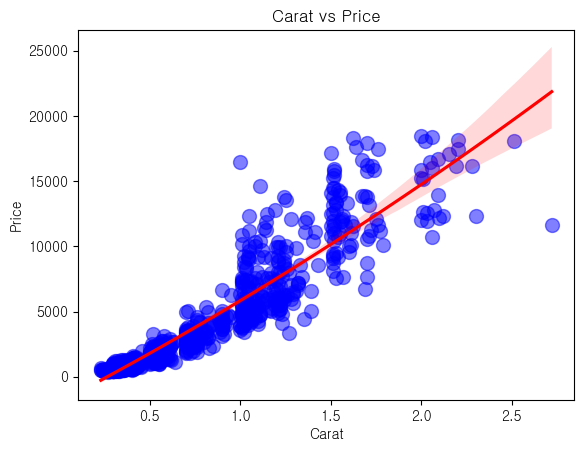

In [110]:
##
diamonds = sns.load_dataset("diamonds")
diamonds.head()

##
# cut = ideal => price vs carat(replot)
# cut이 "Ideal"인 데이터만 필터링
diamonds_df = diamonds[diamonds['cut'] == 'Ideal']
# diamonds_df.shape

# price와 carat의 관계를 regplot을 통해 시각화
sns.regplot(data=diamonds_df.sample(n = 1000),
            x='carat', y='price', # 관계를 산점도와 회귀선으로 시각화
            order = 2,
            scatter_kws = {"fc":"b", "ec":"b", "s":100, "alpha":0.5},
            line_kws = {"color":"red"},
            fit_reg=True,   # 회귀선 표시
            color='b',      # 파란색으로 설정
            marker="o")     # 원형 마커 사용
# 그래프 제목 및 축 레이블 추가
plt.title("Carat vs Price")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()

In [111]:
# sns.lmplot
penguins = sns.load_dataset("penguins")
print(penguins.head())
print(penguins["species"].value_counts())
print(penguins.info())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     

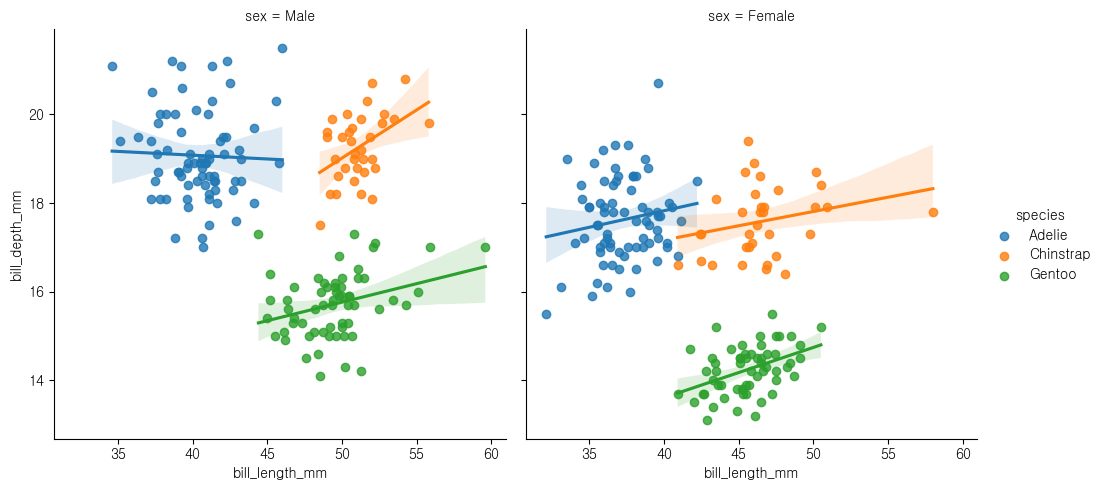

In [112]:
sns.lmplot(penguins, # regplot # regression plot보다 lmplot이 적절한 경우
            x = "bill_length_mm",
            y = "bill_depth_mm",
            hue = "species", # 종으로만 했을때는 경향성이 보이지만
            col = "sex") # 성별을 추가했을때는 경향성이 희석된다 암/수가 양쪽에 쏠려 경향성처럼 보였던 것
plt.show()

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\seaborn\regression.py:598: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\seaborn\regression.py:598: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


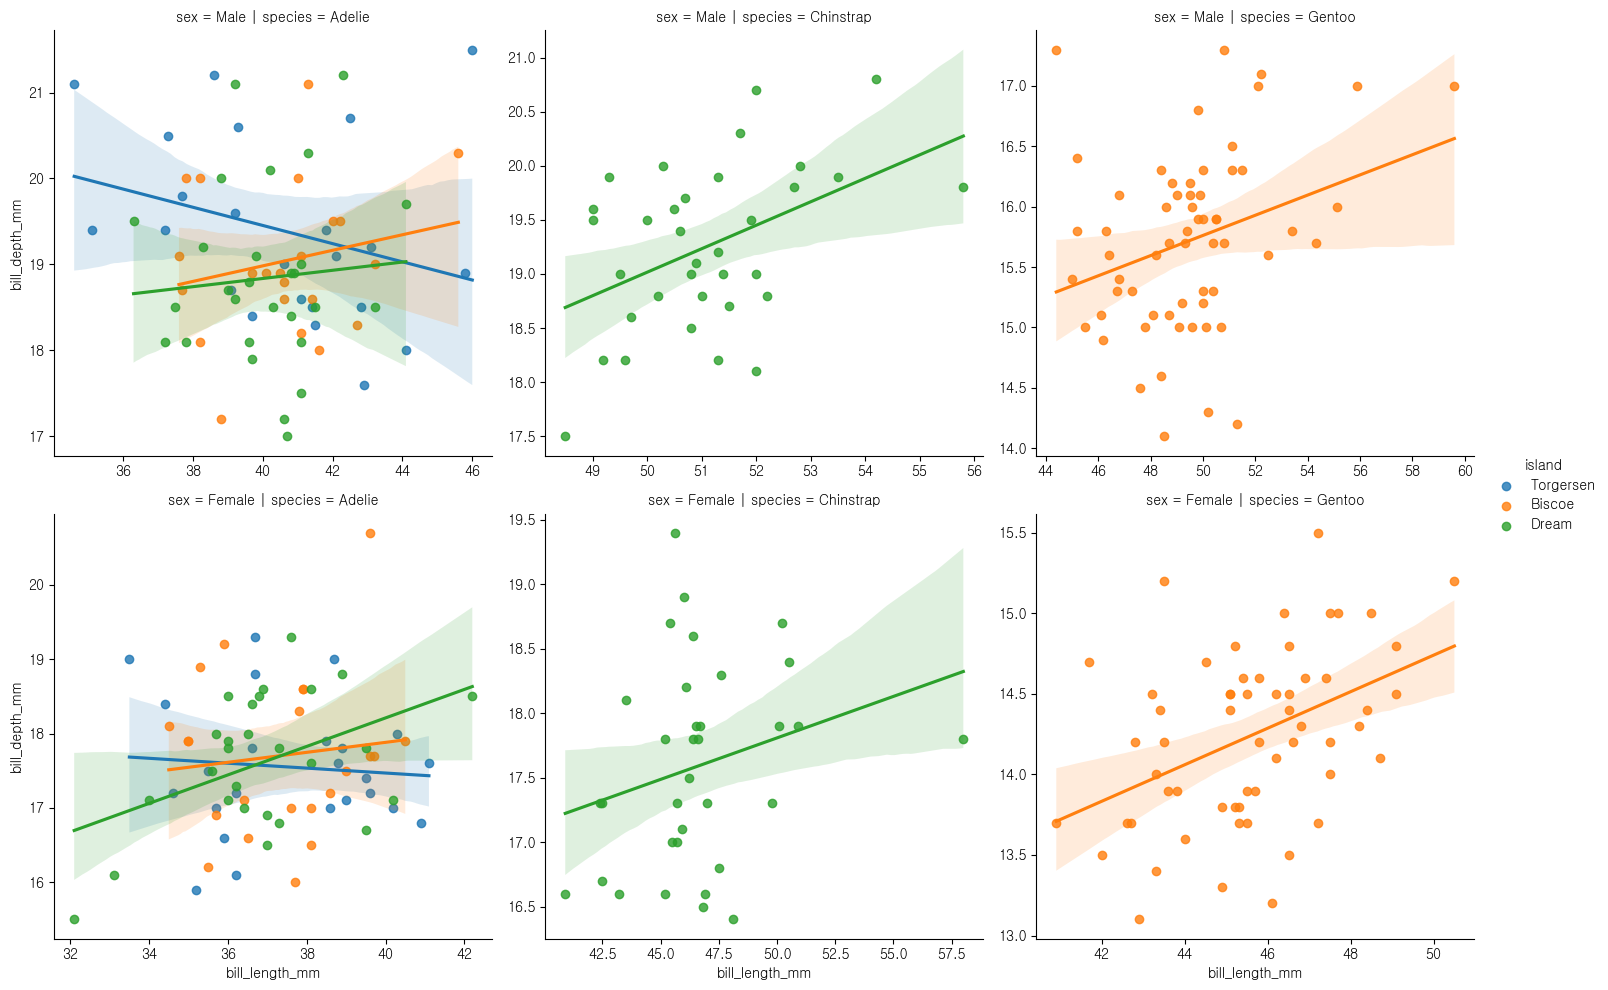

In [113]:
sns.lmplot(penguins,
           x = "bill_length_mm",
           y = "bill_depth_mm",
           col = "species",
           row = "sex",
           hue = "island", # hue가 칼라
           sharex=False,
           sharey=False)
# p.set_xlabels("Carat", size = 12)
# p.set_ylabels("Price", size = 12)
plt.show()

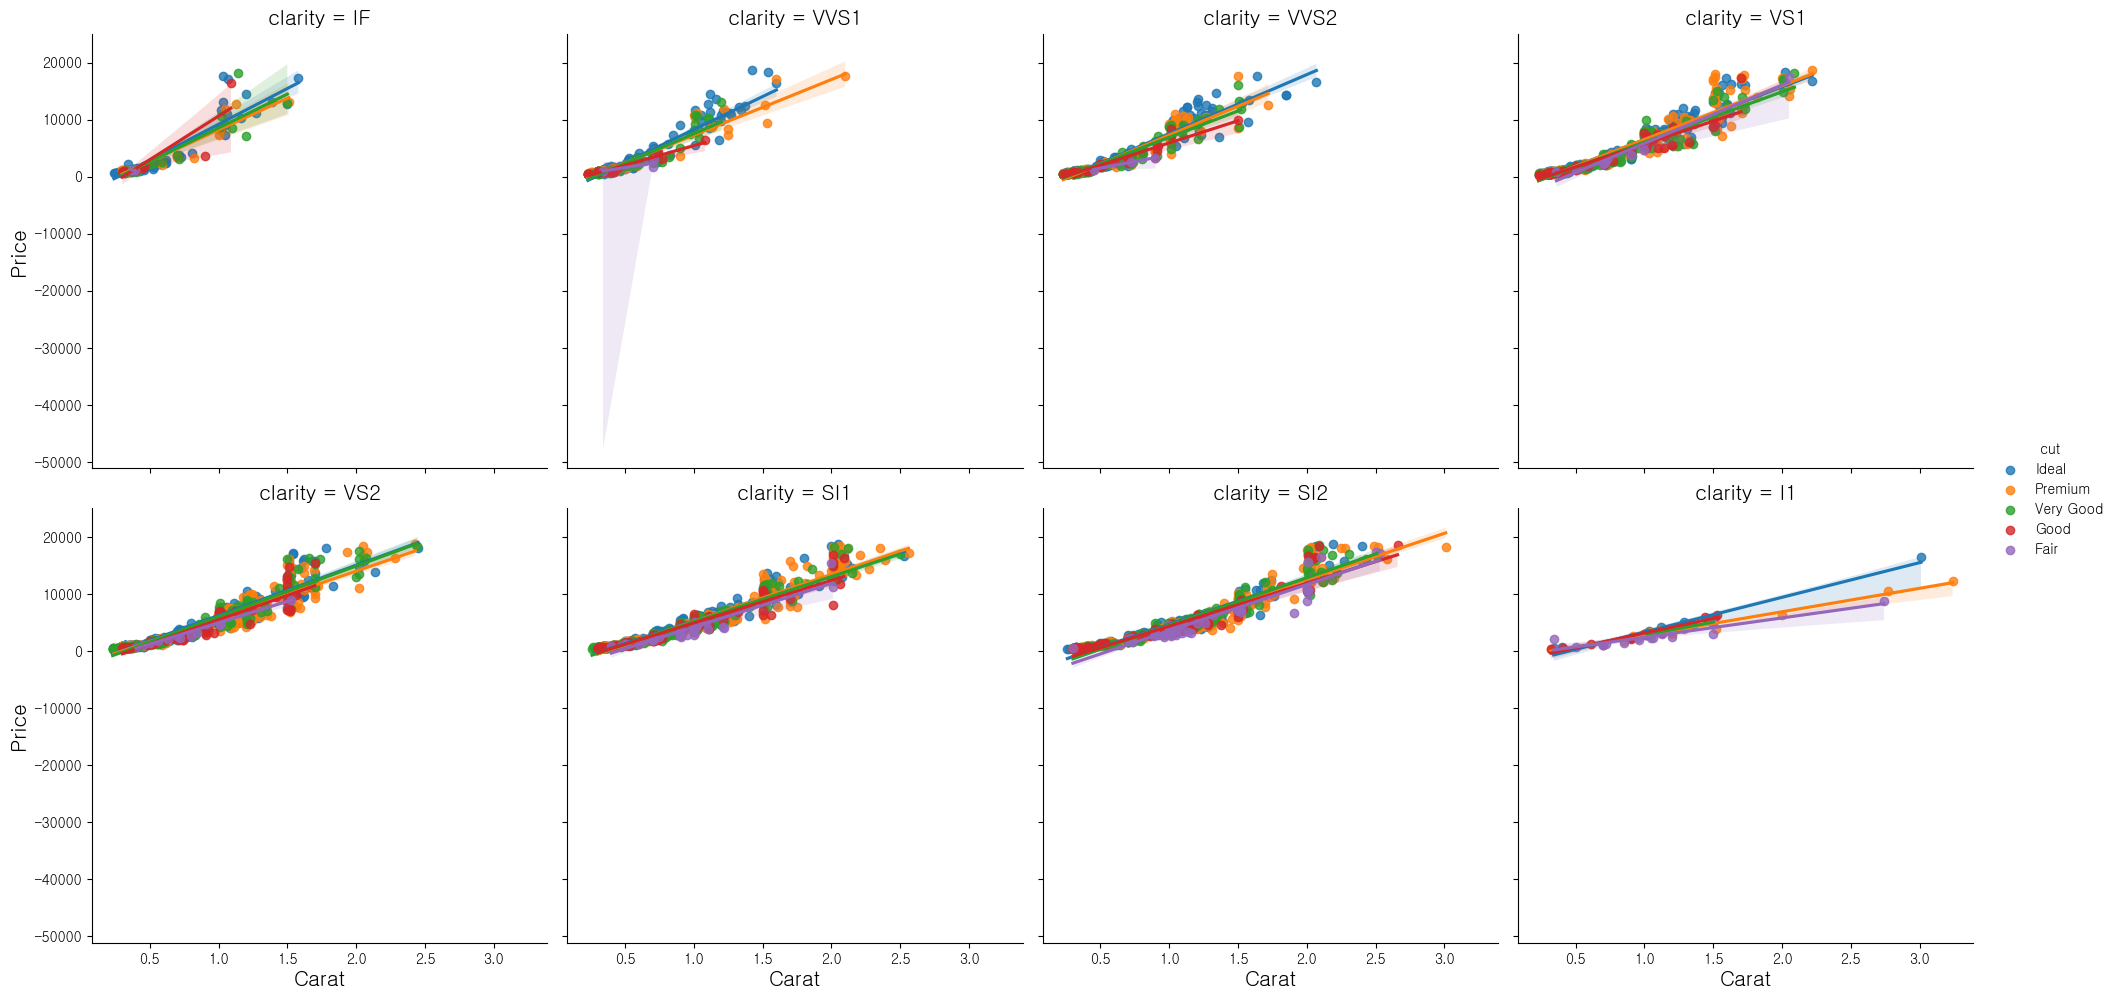

In [114]:
p = sns.lmplot(diamonds.sample(n = 5000),
           x = "carat",
           y = "price",
           col = "clarity",
           col_wrap = 4,
           hue = "cut")
p.set_titles(size = 15)
p.set_xlabels("Carat", size = 15)
p.set_ylabels("Price", size = 15)
plt.show()

In [115]:
# 리스레션과 달리 테이터만 가져와서 자유로운
## sns.scatterplot
tips = sns.load_dataset("tips")
print("tips = \n", tips.head())
print("="*50)
print(tips.info())

tips = 
    total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


In [116]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

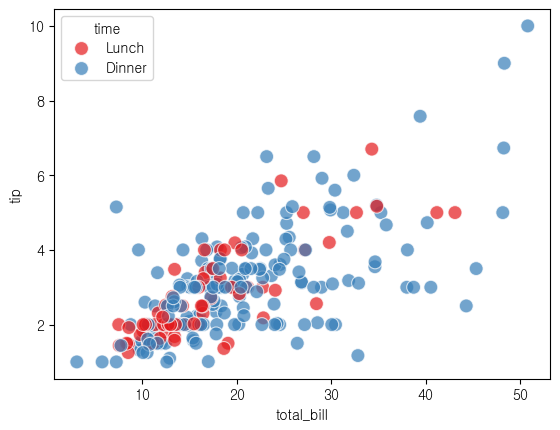

In [117]:
##
sns.scatterplot(tips,
                x = "total_bill",
                y = "tip",
                hue = "time",
                # style = "smoker",
                s = 100,
                alpha = 0.7,
                palette = "Set1")
plt.show()

In [118]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [119]:
color_idx = (diamonds["color"] == "D") | (diamonds["color"] == "E") | (diamonds["color"] == "F")
cut_idx = (diamonds["cut"] == "Ideal") | (diamonds["cut"] == "Good") | (diamonds["cut"] == "Fair")
final_idx = color_idx & cut_idx
print(final_idx)

# diamonds_df = diamonds[final_idx]
# diamonds_df.shape
diamond_df3 = diamonds[final_idx].copy()  # .copy()를 사용하여 복사본을 만듭니다.

diamond_df3['color'] = diamond_df3['color'].cat.remove_unused_categories()
diamond_df3['cut'] = diamond_df3['cut'].cat.remove_unused_categories()

0         True
1        False
2         True
3        False
4        False
         ...  
53935     True
53936     True
53937    False
53938    False
53939     True
Length: 53940, dtype: bool


In [121]:
sns.scatterplot(diamonds_df,
                x = 
                y = )

SyntaxError: invalid syntax (2650258312.py, line 3)

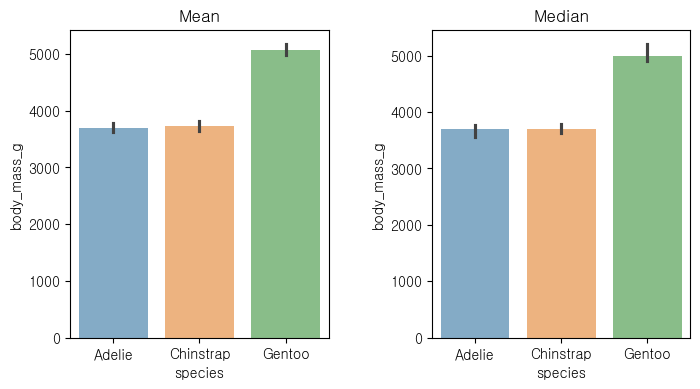

In [122]:
# 1행 2열의 서브플롯을 생성. fig는 전체 그림, axs는 각 서브플롯을 의미
fig, axs = plt.subplots(1, 2, figsize=(8, 4)) 
# 첫 번째 서브플롯 (axs[0]): 종별 체질량의 평균(mean)을 시각화
sns.barplot(penguins, 
            x="species",         # x축: 펭귄의 종
            y="body_mass_g",     # y축: 체질량 (단위: g)
            hue="species",       # 종에 따라 색상을 구분
            alpha=0.6,           # 그래프 투명도 조정
            estimator="mean",    # 평균을 기준으로 막대 그래프 작성
            ax=axs[0])           # 첫 번째 서브플롯에 그래프를 그리기
axs[0].set_title("Mean")          # 첫 번째 서브플롯의 제목 설정

# 두 번째 서브플롯 (axs[1]): 종별 체질량의 중앙값(median)을 시각화
sns.barplot(penguins, 
            x="species",         # x축: 펭귄의 종
            y="body_mass_g",     # y축: 체질량 (단위: g)
            hue="species",       # 종에 따라 색상을 구분
            alpha=0.6,           # 그래프 투명도 조정
            estimator="median",  # 중앙값을 기준으로 막대 그래프 작성
            ax=axs[1])           # 두 번째 서브플롯에 그래프를 그리기
axs[1].set_title("Median")        # 두 번째 서브플롯의 제목 설정
# 두 서브플롯 사이의 공간 간격을 조정 (그래프가 겹치지 않게 설정)
plt.subplots_adjust(wspace=0.4)
plt.show()
# 평균과 중앙값이 같은 분포를 보인다면 데이터가 정규 분포를 따를 가능성이 있다.
# 정규 분포를 따르면, 분석하기에 아주 좋은 조건을 의미한다.
# 데이터가 정규 분포를 따를 경우, 평균은 0이고, 분산은 1로 변환할 수 있다.

In [123]:
iris = sns.load_dataset('iris')
iris.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

NameError: name 'axes' is not defined

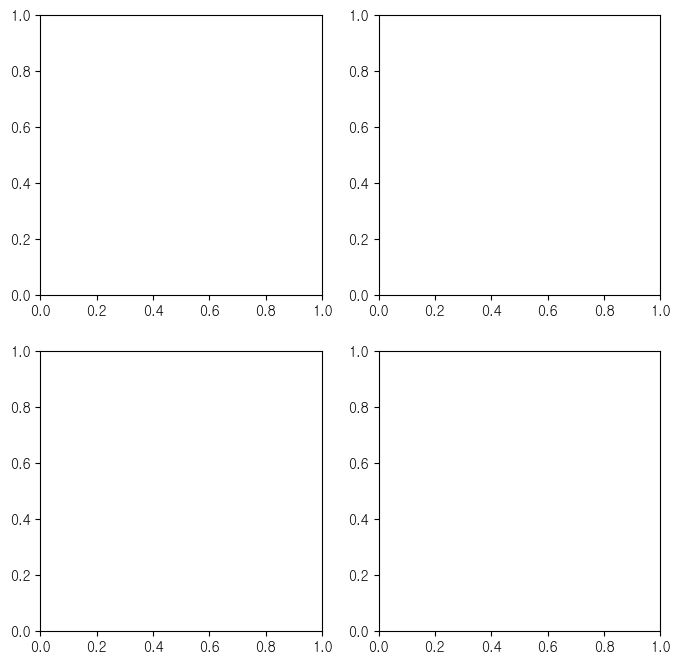

In [124]:
# 시각화할 y축 변수 리스트 (Iris 데이터셋의 4가지 속성)
y_list = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
for i in range(4):
    sns.barplot(iris, x = "species", y = y_list[i], hue = "species", ax = axes[i])
# sns.barplot(iris, x = "species", y = "sepal_length", hue = "species", ax = axes[0])
# sns.barplot(iris, x = "species", y = "sepal_length", hue = "species", ax = axes[0])
# sns.barplot(iris, x = "species", y = "sepal_length", hue = "species", ax = axes[0])
# sns.barplot(iris, x = "species", y = "sepal_length", hue = "species", ax = axes[0])
plt.subplots_adjust(wspace=0.4)
plt.show()

In [125]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


![alt text](<스크린샷 2024-09-09 170754.png>)

In [101]:
mpg = sns.load_dataset("mpg")
mpg_df.head
# 'cyl'을 기준으로 그룹화하고, 각 그룹의 평균(mean)과 표준편차(std) 계산
# grouped_cyl = mpg_df.groupby('cylinders').agg(['mean', 'std'])
# print(grouped_cyl.loc[[4, 6, 8]][[4, 6, 8], mean:std)

<bound method NDFrame.head of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  